In [2]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read CSV and write it to a dataframe
df_layoffs = pd.read_csv(
    "Resources/layoffs.csv")

df_layoffs.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Cisco,SF Bay Area,Infrastructure,4000.0,0.05,2024-08-09,Post-IPO,United States,2.0
1,Branch.io,SF Bay Area,Marketing,100.0,NaN,2024-08-09,Series F,United States,667.0
2,Ready Robotics,Columbus,Manufacturing,NaN,NaN,2024-08-09,Unknown,United States,41.0
3,Fastly,SF Bay Area,Infrastructure,NaN,0.11,2024-08-08,Post-IPO,United States,219.0
4,Eventbrite,SF Bay Area,Consumer,100.0,0.11,2024-08-07,Post-IPO,United States,557.0


In [4]:
# Convert date from string to date time
df_layoffs_dated = df_layoffs.astype({"date":"datetime64[ns]"})


In [5]:
# Confirm all date times are correct
df_layoffs_dated.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3743 entries, 0 to 3742
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company              3743 non-null   object        
 1   location             3742 non-null   object        
 2   industry             3742 non-null   object        
 3   total_laid_off       2451 non-null   float64       
 4   percentage_laid_off  2400 non-null   float64       
 5   date                 3743 non-null   datetime64[ns]
 6   stage                3736 non-null   object        
 7   country              3743 non-null   object        
 8   funds_raised         3340 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 263.3+ KB


In [6]:
# take a peek at the df
df_layoffs_dated.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Cisco,SF Bay Area,Infrastructure,4000.0,0.05,2024-08-09,Post-IPO,United States,2.0
1,Branch.io,SF Bay Area,Marketing,100.0,NaN,2024-08-09,Series F,United States,667.0
2,Ready Robotics,Columbus,Manufacturing,NaN,NaN,2024-08-09,Unknown,United States,41.0
3,Fastly,SF Bay Area,Infrastructure,NaN,0.11,2024-08-08,Post-IPO,United States,219.0
4,Eventbrite,SF Bay Area,Consumer,100.0,0.11,2024-08-07,Post-IPO,United States,557.0


In [7]:
# filter down to just US data
df_layoffs_dated = df_layoffs_dated[df_layoffs_dated.country == 'United States']
# Confirm data is filtered
df_layoffs_dated['country'].value_counts()

country
United States    2427
Name: count, dtype: int64

In [8]:
# create column with just month and year
df_layoffs_dated["period"] = df_layoffs_dated['date'].dt.strftime('%Y/%m')


In [9]:
# create series with total layoffs summed by month
sf_layoffs_bydate = df_layoffs_dated.groupby(["period"])["total_laid_off"].sum()
sf_funds_raised_bydate = df_layoffs_dated.groupby(["period"])["funds_raised"].sum()

sf_layoffs_bydate.head(20)

period
2020/03     7850.0
2020/04    19821.0
2020/05    14674.0
2020/06     3926.0
2020/07     1612.0
2020/08     1456.0
2020/09      567.0
2020/10      110.0
2020/11      237.0
2020/12      132.0
2021/01     3172.0
2021/02      336.0
2021/03       47.0
2021/04      261.0
2021/06     2434.0
2021/08       67.0
2021/09      161.0
2021/10       22.0
2021/11     2070.0
2021/12      900.0
Name: total_laid_off, dtype: float64

In [10]:
# create dataframe from summed series
df_layoffs_bydate = pd.DataFrame({  
    "period" : sf_layoffs_bydate.index, 
    "laid_off_by_month" : sf_layoffs_bydate.values,
    "funds_raised_by_month" : sf_funds_raised_bydate.values
    })

df_layoffs_bydate.head()

,period,laid_off_by_month,funds_raised_by_month
0,2020/03,7850.0,15530.2
1,2020/04,19821.0,43862.0
2,2020/05,14674.0,74191.0
3,2020/06,3926.0,11724.1
4,2020/07,1612.0,4447.0


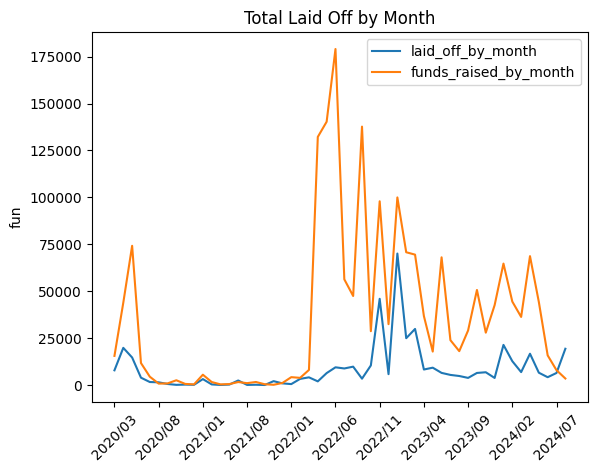

In [17]:
# intialize figure
fig, ax = plt.subplots()
# Plot data
ax.plot("period", "laid_off_by_month", data=df_layoffs_bydate)
# set labels and title
ax.set(ylabel="fun", title= "Total Laid Off by Month")
# Set the number of ticks on the x-axis to 10
ax.set_xticks(ax.get_xticks()[::len(df_layoffs_bydate)//10])
#Rotate x tick labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

ax.plot("period", "funds_raised_by_month", data=df_layoffs_bydate )

ax.legend()
plt.show()

TypeError: cannot unpack non-iterable Axes object

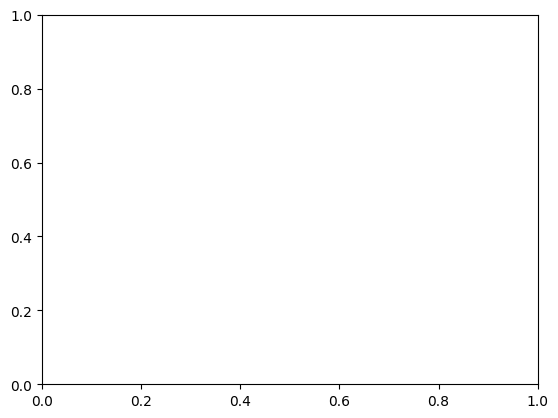

In [19]:
# intialize figure
fig, (ax1, ax2) = plt.subplots()
ax2 = ax1.twinx()
# Plot data
ax1.plot("period", "laid_off_by_month", data=df_layoffs_bydate)
# set labels and title
ax1.set(ylabel="fun", title= "Total Laid Off by Month")
# Set the number of ticks on the x-axis to 10
ax1.set_xticks(ax.get_xticks()[::len(df_layoffs_bydate)//10])
#Rotate x tick labels by 45 degrees
ax1.set_xticklabels(ax.get_xticklabels(), rotation=45)

ax2.plot("period", "funds_raised_by_month", data=df_layoffs_bydate )

ax1.legend()
ax2.legend()
plt.show()